# Translatish
<center>
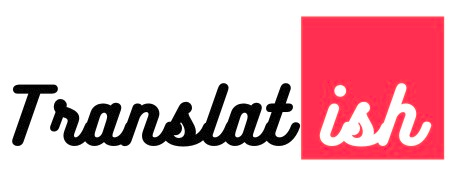



## Introduction:
As in our country India, the national language is considered to be Hindi and it is spoken all over the country, translation of any videos into Hindi can help reach maximum audience.
Most of the population of our country is unable to communicate in English, they cannot understand English language videos. So, translation of such video becomes necessary.
So, to reach a wider audience and make videos available in other languages, we decided to translate the English language videos into Hindi 
language.
Video translation includes transcription,  translation, subtitling, and voice-overs. 

## Steps Involved :
*   Loading of the Data
*   Preprocessing of the data
*   Encoder and Decoder
*   Model Building
*   Training 
*   Testing and Bleu Score




## Requirement Installation

In [ ]:
!pip install tensorflow==2.0.0

In [ ]:
pip install keras==2.1.5

## Libarary Initialization

In [ ]:
import pandas as pd
import numpy as np
import os
import string
from string import digits
import matplotlib.pyplot as plt
%matplotlib inline
import re
import nltk
import seaborn as sns
from sklearn.utils import shuffle
from sklearn.model_selection import train_test_split
from tensorflow.keras.layers import Input, LSTM, Embedding, Dense
from tensorflow.keras.models import Model
from tensorflow.keras.models import Sequential
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras.models import load_model

## Loading of Dataset and Mounting of drive 

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
# Load data by giving Path
data= pd.read_csv("/content/drive/MyDrive/Project Sem 6/NLP/Hindi_English_Truncated_Corpus.csv")
data

,source,english_sentence,hindi_sentence
0,ted,politicians do not have permission to do what ...,"राजनीतिज्ञों के पास जो कार्य करना चाहिए, वह कर..."
1,ted,"I'd like to tell you about one such child,",मई आपको ऐसे ही एक बच्चे के बारे में बताना चाहू...
2,indic2012,This percentage is even greater than the perce...,यह प्रतिशत भारत में हिन्दुओं प्रतिशत से अधिक है।
3,ted,what we really mean is that they're bad at not...,हम ये नहीं कहना चाहते कि वो ध्यान नहीं दे पाते
4,indic2012,.The ending portion of these Vedas is called U...,इन्हीं वेदों का अंतिम भाग उपनिषद कहलाता है।
...,...,...,...
127602,indic2012,Examples of art deco construction can be found...,आर्ट डेको शैली के निर्माण मैरीन ड्राइव और ओवल ...
127603,ted,and put it in our cheeks.,और अपने गालों में डाल लेते हैं।
127604,tides,"As for the other derivatives of sulphur , the ...","जहां तक गंधक के अन्य उत्पादों का प्रश्न है , द..."
127605,tides,its complicated functioning is defined thus in...,Zरचना-प्रकिया को उसने एक पहेली में यों बांधा है .


## Data Preprocessing

In [ ]:
# Unique Sources
data['source'].value_counts()

tides        50000
ted          39881
indic2012    37726
Name: source, dtype: int64

In [ ]:
#checking for missing values or null
pd.isnull(data).sum()

source              0
english_sentence    2
hindi_sentence      0
dtype: int64

In [ ]:
# Drop Null
data = data[data['english_sentence'].notna()]

In [ ]:
# Drop Duplicates
data.drop_duplicates(inplace=True)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


In [ ]:
#Shuffle the points
data=data.sample(n=124827,random_state=42,replace=True)
data.shape

(124827, 3)

In [ ]:
#Convert to Lowercase 
data['english_sentence'] = data['english_sentence'].apply(lambda x: x.lower())
data['hindi_sentence'] = data['hindi_sentence'].apply(lambda x: x.lower())

In [ ]:
#Removing the Quotes
data['english_sentence'] = data['english_sentence'].apply(lambda x: re.sub("'", '', x))
data['hindi_sentence'] = data['hindi_sentence'].apply(lambda x: re.sub("'", '', x))

In [ ]:
#special characters
exclude = set(string.punctuation) # Set of all special characters
print(exclude)
data['english_sentence'] = data['english_sentence'].apply(lambda sen : ''.join(char for char in sen if char not in exclude))
data['hindi_sentence'] = data['hindi_sentence'].apply(lambda sen : ''.join(char for char in sen if char not in exclude))

{'!', '$', '&', '@', "'", '(', '`', '}', '[', '_', ';', '/', '.', '{', ']', ',', '%', '#', '?', '<', '|', '*', '=', ':', '+', '>', ')', '-', '\\', '"', '^', '~'}


In [ ]:
#dataset after complete preprocessing
data.head()

,source,english_sentence,hindi_sentence
124663,tides,as part of your treatment some kind of photogr...,आप के इलाज के तौर पर कुछ प्रकार के छायाचित्र र...
15986,indic2012,the festival has special significance for the ...,कृषक वर्ग के लिये इस पर्व का विशेष महत्त्व है।
862,tides,the sandhara and sarvatobhadra forms are the m...,संधार और सर्वतोभद्र प्रकार सर्वोत्कृष्ट हैं
105873,indic2012,ther are 2town corporations and remaining tota...,नगर निगम २ और सभी श्रेणी की नगरपालिकाएं १८० हैं।
122524,tides,the judge too moved as if to rise but rememb...,जज तक उठने को थे पर अपनी न्यायिका रीति को ध्य...


In [ ]:
#Removing the numbers from all sentences/records
all_digits = str.maketrans('', '', digits)

data['english_sentence'] = data['english_sentence'].apply(lambda sen : sen.translate(all_digits))
data['hindi_sentence'] = data['hindi_sentence'].apply(lambda sen : sen.translate(all_digits))

data['hindi_sentence'] = data['hindi_sentence'].apply(lambda sen : re.sub("[१२३४५६७८९०]", "", sen))

In [ ]:
#removing the extra spaces
data['english_sentence'] = data['english_sentence'].apply(lambda sen : sen.strip())
data['hindi_sentence'] = data['hindi_sentence'].apply(lambda sen : sen.strip())
data['english_sentence'] = data['english_sentence'].apply(lambda sen : re.sub(" +", " ", sen))
data['hindi_sentence'] = data['hindi_sentence'].apply(lambda sen : re.sub(" +", " ", sen))

In [ ]:
#adding start and end tokens in hindi sentence such that decoder understand the sequence
data['hindi_sentence'] = data['hindi_sentence'].apply(lambda x : 'START_ '+ x + ' _END')
data

,source,english_sentence,hindi_sentence
124663,tides,as part of your treatment some kind of photogr...,START_ आप के इलाज के तौर पर कुछ प्रकार के छाया...
15986,indic2012,the festival has special significance for the ...,START_ कृषक वर्ग के लिये इस पर्व का विशेष महत्...
862,tides,the sandhara and sarvatobhadra forms are the m...,START_ संधार और सर्वतोभद्र प्रकार सर्वोत्कृष्ट...
105873,indic2012,ther are town corporations and remaining total...,START_ नगर निगम और सभी श्रेणी की नगरपालिकाएं ह...
122524,tides,the judge too moved as if to rise but remember...,START_ जज तक उठने को थे पर अपनी न्यायिका रीति ...
...,...,...,...
104910,indic2012,the date of diwali,START_ वर्षों में दीपावली की तिथि _END
101180,tides,from its inscriptions the temple is known to h...,START_ इसके शिलालेख से ज्ञात होता है कि यह मंद...
18667,tides,the cows are fairly good milkyielders,START_ गायें पर्याप्त मात्रा में दूध देती हैं ...
95342,indic2012,the humidity in mumbais weather is due to prec...,START_ मुंबई में औसत तापमान एवं वर्षण प्रैसिपि...


## Extracting Useful Information from dataset

In [ ]:
#creating the list of english and hindi words
all_eng_words=set()
for eng in data['english_sentence']:
    for word in eng.split():
        if word not in all_eng_words:
            all_eng_words.add(word)

all_hindi_words=set()
for hin in data['hindi_sentence']:
    for word in hin.split():
        if word not in all_hindi_words:
            all_hindi_words.add(word)

In [ ]:
input_words = sorted(list(all_eng_words))
target_words = sorted(list(all_hindi_words))
num_encoder_tokens = len(all_eng_words)
num_decoder_tokens = len(all_hindi_words)
num_encoder_tokens, num_decoder_tokens

(56633, 65927)

In [ ]:
num_decoder_tokens += 1
num_encoder_tokens +=1

In [ ]:
input_token_index = dict([(word, i+1) for i, word in enumerate(input_words)])
target_token_index = dict([(word, i+1) for i, word in enumerate(target_words)])

In [ ]:
reverse_input_char_index = dict((i, word) for word, i in input_token_index.items())
reverse_target_char_index = dict((i, word) for word, i in target_token_index.items())

In [ ]:
#use
data['length_eng_sentence']=data['english_sentence'].apply(lambda x:len(x.split(" ")))
data['length_hin_sentence']=data['hindi_sentence'].apply(lambda x:len(x.split(" ")))

max_length_src=max(data['length_hin_sentence'])
max_length_tar=max(data['length_eng_sentence'])
max_length_src

419

In [ ]:
#use
data=data[data['length_eng_sentence']<=20]
data=data[data['length_hin_sentence']<=20]
data.shape


(82714, 5)

## Model Implementation

In [ ]:
#train and test split of data
X, Y = data['english_sentence'], data['hindi_sentence']
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size = 0.2,random_state=42)
X_train.shape, X_test.shape

((66171,), (16543,))

In [ ]:
#Generating of batch from dataset
def generate_batch(X = X_train, y = y_train, batch_size = 128):
    ''' Generate a batch of data '''
    while True:
        for j in range(0, len(X), batch_size):
            global list_of_not_found
            list_of_not_found=[]
            encoder_input_data = np.zeros((batch_size, max_length_src),dtype='float32')
            decoder_input_data = np.zeros((batch_size, max_length_tar),dtype='float32')
            decoder_target_data = np.zeros((batch_size, max_length_tar, num_decoder_tokens),dtype='float32')
            for i, (input_text, target_text) in enumerate(zip(X[j:j+batch_size], y[j:j+batch_size])):
                for t, word in enumerate(input_text.split()):
                    if word not in all_eng_words:
                    
                      list_of_not_found.append(word)
                      continue
                    else:
                      encoder_input_data[i, t] = input_token_index[word] # encoder input seq
                for t, word in enumerate(target_text.split()):
                    if word not in all_hindi_words:
                      continue
                    else:
                      if t<len(target_text.split())-1:
                          decoder_input_data[i, t] = target_token_index[word] # decoder input seq
                      if t>0:
                          decoder_target_data[i, t - 1, target_token_index[word]] = 1.
            yield([encoder_input_data, decoder_input_data], decoder_target_data)

In [ ]:
#difining the latent dimension
latent_dim=256

In [ ]:
tf.compat.v1.get_default_graph()

## Encoder Structure:
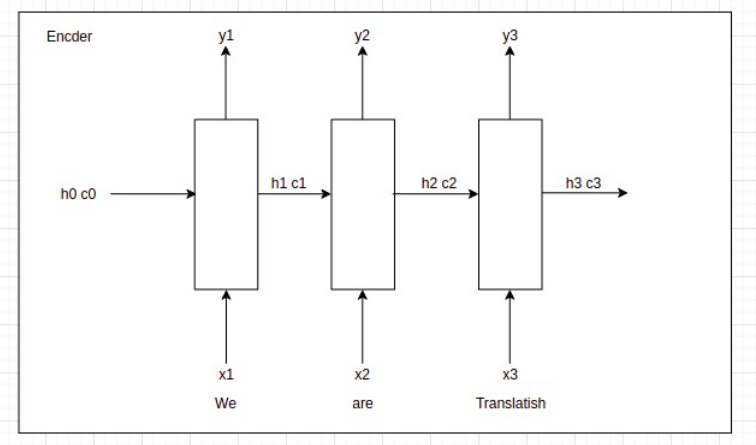


In [ ]:
# Encoder
encoder_inputs = Input(shape=(None,))
enc_emb =  Embedding(num_encoder_tokens,latent_dim, mask_zero = True)(encoder_inputs)
encoder_lstm = LSTM(latent_dim, return_state=True)
encoder_outputs, state_h, state_c = encoder_lstm(enc_emb)
# We discard `encoder_outputs` and only keep the states.
encoder_states = [state_h, state_c]

## Decoder Structure :
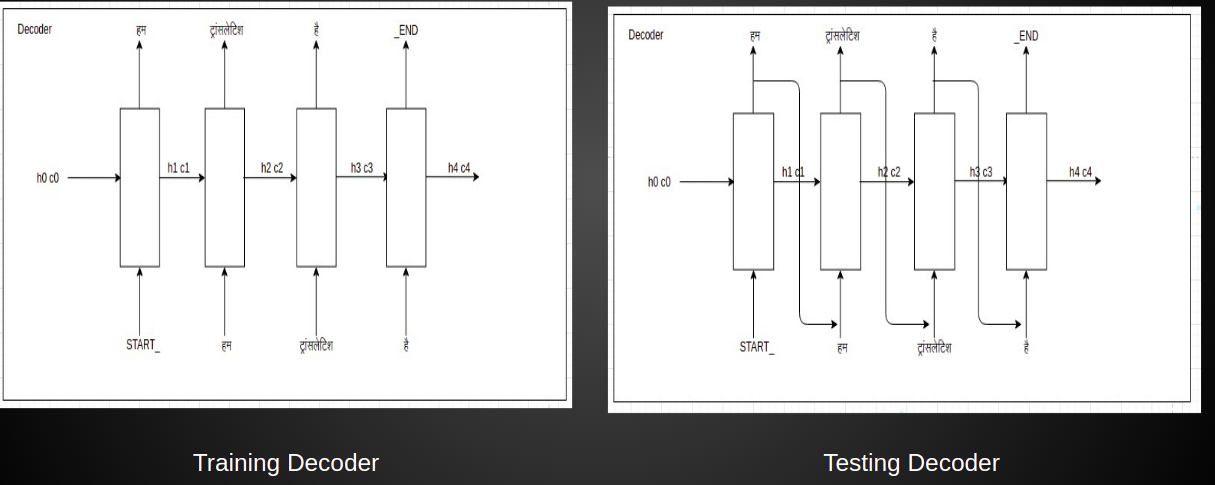

In [ ]:
# Decoder
decoder_inputs = Input(shape=(None,))
dec_emb_layer = Embedding(num_decoder_tokens, latent_dim, mask_zero = True)
dec_emb = dec_emb_layer(decoder_inputs)

decoder_lstm = LSTM(latent_dim, return_sequences=True, return_state=True)
decoder_outputs, _, _ = decoder_lstm(dec_emb,
                                     initial_state=encoder_states)
decoder_dense = Dense(num_decoder_tokens, activation='softmax')
decoder_outputs = decoder_dense(decoder_outputs)
model = Model([encoder_inputs, decoder_inputs], decoder_outputs)



---



---



In [ ]:
#compilation of model
model.compile(optimizer='rmsprop', loss='categorical_crossentropy', metrics=["accuracy"])

In [ ]:
#desplaying the model summary
model.summary()

Model: "model"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_1 (InputLayer)            [(None, None)]       0                                            
__________________________________________________________________________________________________
input_2 (InputLayer)            [(None, None)]       0                                            
__________________________________________________________________________________________________
embedding (Embedding)           (None, None, 256)    14498304    input_1[0][0]                    
__________________________________________________________________________________________________
embedding_1 (Embedding)         (None, None, 256)    16877568    input_2[0][0]                    
______________________________________________________________________________________________

In [ ]:
#Free perameters (Used for training perpose)
train_samples = len(X_train)
val_samples = len(X_test)
batch_size = 10
epochs = 10

In [ ]:
#training of the model
model.fit_generator(generator = generate_batch(X_train, y_train, batch_size = batch_size),
                    steps_per_epoch = train_samples//batch_size,
                    epochs=epochs,
                    validation_data = generate_batch(X_test, y_test, batch_size = batch_size),
                    validation_steps = val_samples//batch_size)

Epoch 1/10
262/262 [==============================] - 1739s 7s/step - loss: 0.3659 - accuracy: 0.1137 - val_loss: 0.3427 - val_accuracy: 0.1242
Epoch 2/10
232/262 [=========================>....] - ETA: 3:01 - loss: 0.3353 - accuracy: 0.1209



---



---



In [ ]:
#Saving the model weights
#model.save_weights('nmt_weights.h5')

#once trained and saved, load the weights
model.load_weights('/content/drive/MyDrive/Project Sem 6/NLP/Final/files/nmt_weights.h5')

In [ ]:
#Encoder decoder setup for unknown sententeces (For Testing purpose)
encoder_model = Model(encoder_inputs, encoder_states)

# Decoder setup
# Below tensors will hold the states of the previous time step
decoder_state_input_h = Input(shape=(latent_dim,))
decoder_state_input_c = Input(shape=(latent_dim,))
decoder_states_inputs = [decoder_state_input_h, decoder_state_input_c]

dec_emb2= dec_emb_layer(decoder_inputs) # Get the embeddings of the decoder sequence

# To predict the next word in the sequence, set the initial states to the states from the previous time step
decoder_outputs2, state_h2, state_c2 = decoder_lstm(dec_emb2, initial_state=decoder_states_inputs)
decoder_states2 = [state_h2, state_c2]
decoder_outputs2 = decoder_dense(decoder_outputs2)

decoder_model = Model(
    [decoder_inputs] + decoder_states_inputs,
    [decoder_outputs2] + decoder_states2)

In [ ]:
#function used to translated the input seq to hindi sentences
def decode_sequence(input_seq):
    # Encode the input as state vectors.
    states_value = encoder_model.predict(input_seq)
    # Generate empty target sequence of length 1.
    target_seq = np.zeros((1,1))
    # Populate the first character of target sequence with the start character.
    target_seq[0, 0] = target_token_index['START_']

    # Sampling loop for a batch of sequences
    # (to simplify, here we assume a batch of size 1).
    stop_condition = False
    decoded_sentence = ''
    while not stop_condition:
        output_tokens, h, c = decoder_model.predict([target_seq] + states_value)

        # Sample a token
        sampled_token_index = np.argmax(output_tokens[0, -1, :])
        sampled_char = reverse_target_char_index[sampled_token_index]
        decoded_sentence += ' '+sampled_char

        # Exit condition: either hit max length
        # or find stop character.
        if (sampled_char == '_END' or
           len(decoded_sentence) > 50):
            stop_condition = True

        # Update the target sequence (of length 1).
        target_seq = np.zeros((1,1))
        target_seq[0, 0] = sampled_token_index

        # Update states
        states_value = [h, c]

    return decoded_sentence

In [ ]:
#generation of the batch of testing purpose where and x and y are extracted english text from the video
train_gen = generate_batch(X_test, y_test, batch_size = 1)
k=-1

## Finding the Bleu score for diffrent datasets

In [ ]:
score=0
s_list=[]
for i in range(len(x[:500])):
  #try:
    #print('Input English sentence:', x[i:i+1].values[0])
    #print('Actual Hindi Translation:', y[i:i+1].values[0][6:-4])
    (input_seq, actual_output), _ = next(train_gen)
    decoded_sentence = decode_sequence(input_seq)
    #print(list_of_not_found)
    BLEUscore = nltk.translate.bleu_score.sentence_bleu([y[i:i+1].values[0][6:-4]], decoded_sentence[:-4], weights = (0.25, 0.25, 0.25, 0.25))
    score+=BLEUscore
    print(i)
    s_list.append(BLEUscore)
    #print(BLEUscore)
    #print('Predicted Hindi Translation:', decoded_sentence[:-4])
    #print('------------------------------')
    #print()
    #if i>10:
    #   break

In [ ]:
#Score for unknown dataset (diffrent context)
score/len(x)  

0.08419566236522558

In [ ]:
#36% with cumulative 2gram and 26% with cumulative 4 gram for Github dataset (diffrent dataset for testing)
score/len(x)     

0.26762565361034635

In [ ]:
#Bleu score for our own dataset (where on model trained)
score/len(X_test)

0.5301366720527206



---



---



In [ ]:
#final testing demo
k+=1
(input_seq, actual_output), _ = next(train_gen)
decoded_sentence = decode_sequence(input_seq)
print('Input English sentence:', X_test[k:k+1].values[0])
print('Actual Hindi Translation:', y_test[k:k+1].values[0][6:-4])
print('Predicted Hindi Translation:', decoded_sentence[:-4])

Input English sentence: that reminded me of my father
Actual Hindi Translation:  मुझे अपने पिता की याद दिलाई। 
Predicted Hindi Translation:  मुझे अपने पिता की याद जाने से 


In [ ]:
#final testing demo
k+=1
(input_seq, actual_output), _ = next(train_gen)
decoded_sentence = decode_sequence(input_seq)
print('Input English sentence:', X_test[k:k+1].values[0])
print('Actual Hindi Translation:', y_test[k:k+1].values[0][6:-4])
print('Predicted Hindi Translation:', decoded_sentence[:-4])

Input English sentence: pratapgad district
Actual Hindi Translation:  प्रतापगढ़ जिला 
Predicted Hindi Translation:  जिला 


In [ ]:
#final testing demo
k+=1
(input_seq, actual_output), _ = next(train_gen)
decoded_sentence = decode_sequence(input_seq)
print('Input English sentence:', X_test[k:k+1].values[0])
print('Actual Hindi Translation:', y_test[k:k+1].values[0][6:-4])
print('Predicted Hindi Translation:', decoded_sentence[:-4])

Input English sentence: has really changed my life
Actual Hindi Translation:  इसने मेरा जीवन बदल दिया है। 
Predicted Hindi Translation:  मेरा जीवन बदल गया है। 


In [ ]:
#final testing demo
k+=1
(input_seq, actual_output), _ = next(train_gen)
decoded_sentence = decode_sequence(input_seq)
print('Input English sentence:', X_test[k:k+1].values[0])
print('Actual Hindi Translation:', y_test[k:k+1].values[0][6:-4])
print('Predicted Hindi Translation:', decoded_sentence[:-4])

Input English sentence: we do not accept postal forms by email or email applications by post
Actual Hindi Translation:  हम ड़ाक वाले फॉर्म इमेल से मिलने मिलने या इमेल आवेदनपत्र ड़ाक से मिलने पर उन्हें नही मानते 
Predicted Hindi Translation:  हम एक तरीके से हनुमान और मिलने सकते हैं या समा


In [ ]:
#final testing demo
k+=1
(input_seq, actual_output), _ = next(train_gen)
decoded_sentence = decode_sequence(input_seq)
print('Input English sentence:', X_test[k:k+1].values[0])
print('Actual Hindi Translation:', y_test[k:k+1].values[0][6:-4])
print('Predicted Hindi Translation:', decoded_sentence[:-4])

Input English sentence: ti believe in sacrifice
Actual Hindi Translation:  यज्ञ में विश्वास करना 
Predicted Hindi Translation:  यज्ञ में विश्वास करना 
